Welcome to Week 5!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. ![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access the [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine.
.

In [1]:
#run this once per kernal crash
!wget https://github.com/MohamedElashri/ROOT/releases/download/ubuntu/root_v6.28.04_Ubuntu_20.04.zip
!unzip /content/root_v6.28.04_Ubuntu_20.04.zip
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion
!apt-get install libpython3.6-dev

Streaming output truncated to the last 5000 lines.
  inflating: root_build/tutorials/hsimple.root  
   creating: root_build/tutorials/gui/
  inflating: root_build/tutorials/gui/iconAsXPMData.C  
  inflating: root_build/tutorials/gui/splitterVertical.C  
  inflating: root_build/tutorials/gui/guitest_playback.C  
  inflating: root_build/tutorials/gui/customTH1Fmenu.C  
  inflating: root_build/tutorials/gui/worldmap.jpg  
  inflating: root_build/tutorials/gui/calendar.C  
  inflating: root_build/tutorials/gui/mditest.C  
  inflating: root_build/tutorials/gui/Slider3Demo.C  
  inflating: root_build/tutorials/gui/mditestbg.xpm  
  inflating: root_build/tutorials/gui/textEntries.C  
  inflating: root_build/tutorials/gui/ntupleTableTest.C  
  inflating: root_build/tutorials/gui/customContextMenu.C  
  inflating: root_build/tutorials/gui/splitterHorizontal.C  
  inflating: root_build/tutorials/gui/guiWithCINT.C  
  inflating: root_build/tutorials/gui/CPUMeter.C  
  inflating: root_build/tutori

In [2]:
# The following is needed because colab upgraded the openssl library
!wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
!sudo dpkg -i libssl1.1_1.1.1f-1ubuntu2_amd64.deb

--2024-03-10 13:37:16--  http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
Resolving archive.ubuntu.com (archive.ubuntu.com)... 91.189.91.82, 91.189.91.83, 185.125.190.39, ...
Connecting to archive.ubuntu.com (archive.ubuntu.com)|91.189.91.82|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1318204 (1.3M) [application/vnd.debian.binary-package]
Saving to: ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb’

libssl1.1_1.1.1f-1u 100%[===================>]   1.26M  6.18MB/s    in 0.2s    

2024-03-10 13:37:16 (6.18 MB/s) - ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb’ saved [1318204/1318204]

Selecting previously unselected package libssl1.1:amd64.
(Reading database ... 121899 files and directories currently installed.)
Preparing to unpack libssl1.1_1.1.1f-1ubuntu2_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2) ...
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-l

In [1]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")
import ctypes
ctypes.cdll.LoadLibrary('/content/root_build/lib//libCore.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libThread.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libTreePlayer.so')


<CDLL '/content/root_build/lib//libTreePlayer.so', handle 5736d7cbc290 at 0x784e8a421ae0>

Welcome to JupyROOT 6.28/04


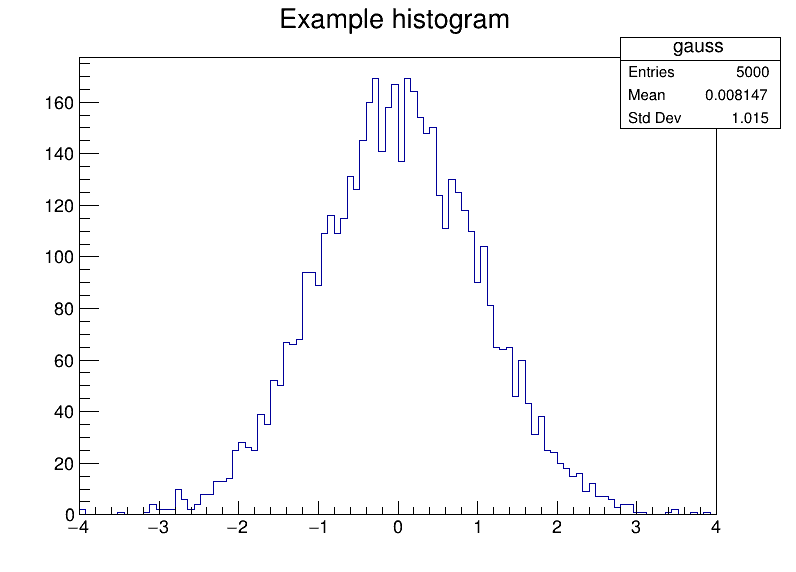

In [2]:
#Now we can check if we have everything working as we expect:
#Import brings the ROOT framework into our python environment.
import ROOT
#We define a 1 dimensional histogram, with 100 bins which ranges from -4 to +4
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
#Fill the histogram with gaussian (random) distribution
h.FillRandom("gaus")
#make a Canvas (i.e. a drawing)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#Draw my histogram
h.Draw()
#Show me the canvas
c.Draw()

All being well - this should give no errors and we should have some kind of Gaussian distribution above.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/17323/files/3634864?module_item_id=644095

Then upload it directly. You can also run the following:

In [64]:
#downloading MagnetDown and MagnetUp file
!mkdir LHCb_Data && cd LHCb_Data && wget http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root && wget http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root

--2024-03-10 17:20:54--  http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root
Resolving opendata.cern.ch (opendata.cern.ch)... 137.138.6.31, 2001:1458:201:8b::100:1c8
Connecting to opendata.cern.ch (opendata.cern.ch)|137.138.6.31|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 666484974 (636M) [application/octet-stream]
Saving to: ‘B2HHH_MagnetDown.root’

B2HHH_MagnetDown.ro 100%[===================>] 635.61M  27.3MB/s    in 24s     

2024-03-10 17:21:21 (26.4 MB/s) - ‘B2HHH_MagnetDown.root’ saved [666484974/666484974]

--2024-03-10 17:21:21--  http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root
Resolving opendata.cern.ch (opendata.cern.ch)... 137.138.6.31, 2001:1458:201:8b::100:1c8
Connecting to opendata.cern.ch (opendata.cern.ch)|137.138.6.31|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444723234 (424M) [application/octet-stream]
Saving to: ‘B2HHH_MagnetUp.root’

B2HHH_MagnetUp.root 100%[===================>] 4

TFile**		/content/LHCb_Data/B2HHH_MagnetDown.root	
 TFile*		/content/LHCb_Data/B2HHH_MagnetDown.root	
  KEY: TTree	DecayTree;1	Tree continaing data for B- --> h-h+h- decays
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #0 because H1_PZ cannot accommodate the value 51820.2
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #1 because H1_PX cannot accommodate the value -4985.13
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #2 because H1_PZ cannot accommodate the value 90762.7
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #3 because H1_PY cannot accommodate the value 3413.79
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(data) Ignored 4967545 out-of-range events


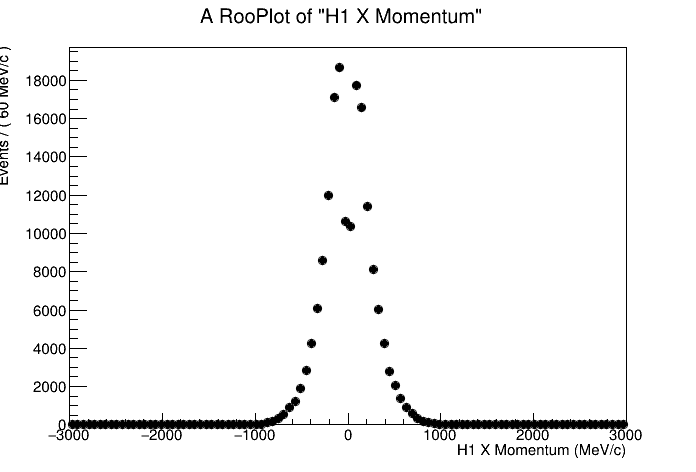

In [3]:

#Since we need to use ROOT, we must first import this into Python:
import ROOT
#Then we open the ROOT file using the TFile command. - note you need to make this file path correct for your own setup!
f = ROOT.TFile.Open("/content/LHCb_Data/B2HHH_MagnetDown.root", "READONLY")
#From our file, we have to extract the DecayTree
f.ls() #we can see the name of the tree
tree=f.Get("DecayTree")
#Now we can grab some variables as a test:
ymomentum = ROOT.RooRealVar("H1_PY","H1 Y Momentum",-3000,3000,"MeV/c")
xmomentum = ROOT.RooRealVar("H1_PX","H1 X Momentum",-3000,3000,"MeV/c")
zmomentum = ROOT.RooRealVar("H1_PZ","H1 Z Momentum",-3000,3000,"MeV/c")
# We then create a dataset for us to play with
data = ROOT.RooDataSet("data","data set", tree, ROOT.RooArgSet(xmomentum,ymomentum,zmomentum), "1==1")
# Now we create a canvas, plot our data onto the canvas and draw it:
c = ROOT.TCanvas("c","c")
frame = xmomentum.frame()
data.plotOn(frame)
frame.Draw()
c.Draw()

#Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce both particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are 524 [documented](http://pdg.lbl.gov/2014/listings/rpp2014-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable called H1_Ptot

In [7]:
!pip install uproot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.1/348.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.7/774.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.4/706.4 kB 18.0 MB/s eta 0:00:00


In [4]:
import uproot
file = uproot.open("/content/LHCb_Data/B2HHH_MagnetDown.root")
file.keys()

['DecayTree;1']

In [5]:
tree = file["DecayTree"]
tree.keys()

['B_FlightDistance',
 'B_VertexChi2',
 'H1_PX',
 'H1_PY',
 'H1_PZ',
 'H1_ProbK',
 'H1_ProbPi',
 'H1_Charge',
 'H1_IPChi2',
 'H1_isMuon',
 'H2_PX',
 'H2_PY',
 'H2_PZ',
 'H2_ProbK',
 'H2_ProbPi',
 'H2_Charge',
 'H2_IPChi2',
 'H2_isMuon',
 'H3_PX',
 'H3_PY',
 'H3_PZ',
 'H3_ProbK',
 'H3_ProbPi',
 'H3_Charge',
 'H3_IPChi2',
 'H3_isMuon']

In [6]:
import numpy as np
#making arrays for each direction
xmomentum1 = tree["H1_PX"].array(library="np")
ymomentum1 = tree["H1_PY"].array(library="np")
zmomentum1 = tree["H1_PZ"].array(library="np")

In [7]:
#calculating total momentum
totmomentum1 = np.sqrt(np.square(xmomentum1) + np.square(ymomentum1) + np.square(zmomentum1))

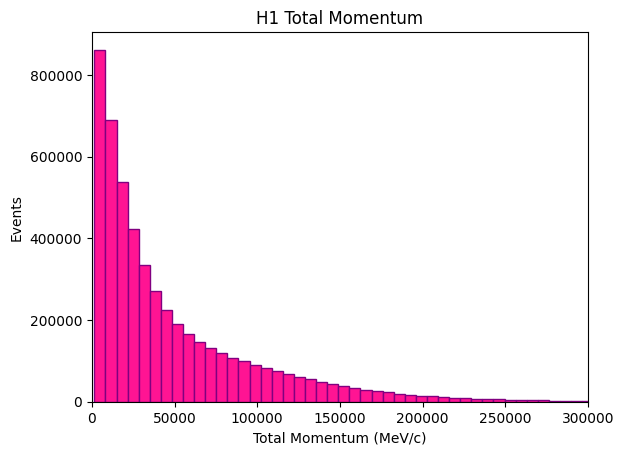

In [8]:
import matplotlib.pyplot as plt
#plotting histogram for H1
plt.hist(totmomentum1, bins = 2000, color='deeppink', edgecolor='purple')
plt.xlim(0, 0.3*1e6)
plt.xlabel('Total Momentum (MeV/c)')
plt.ylabel('Events')
plt.title('H1 Total Momentum')
plt.show()

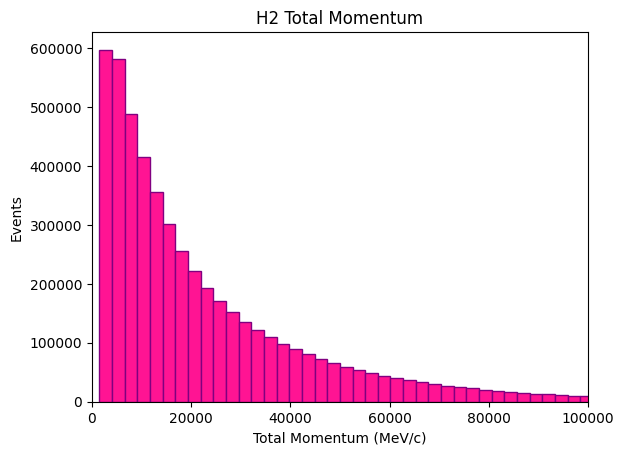

In [9]:
#making arrays for each direction
xmomentum2 = tree["H2_PX"].array(library="np")
ymomentum2 = tree["H2_PY"].array(library="np")
zmomentum2 = tree["H2_PZ"].array(library="np")

#calculating total momentum
totmomentum2 = np.sqrt(np.square(xmomentum2) + np.square(ymomentum2) + np.square(zmomentum2))

#plotting histogram for H2
plt.hist(totmomentum2, bins = 500, color='deeppink', edgecolor='purple')
plt.xlim(0, 0.1*1e6)
plt.xlabel('Total Momentum (MeV/c)')
plt.ylabel('Events')
plt.title('H2 Total Momentum')
plt.show()

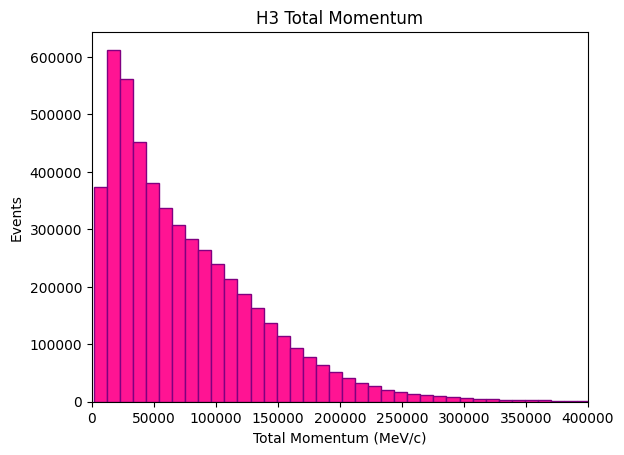

In [10]:
#making arrays for each direction
xmomentum3 = tree["H3_PX"].array(library="np")
ymomentum3 = tree["H3_PY"].array(library="np")
zmomentum3 = tree["H3_PZ"].array(library="np")

#calculating total momentum
totmomentum3 = np.sqrt(np.square(xmomentum3) + np.square(ymomentum3) + np.square(zmomentum3))

#plotting histogram for H3
plt.hist(totmomentum3, bins = 1000, color='deeppink', edgecolor='purple')
plt.xlim(0, 0.4*1e6)
plt.xlabel('Total Momentum (MeV/c)')
plt.ylabel('Events')
plt.title('H3 Total Momentum')
plt.show()

Now plot the total momentum for the mother (M_Ptot)

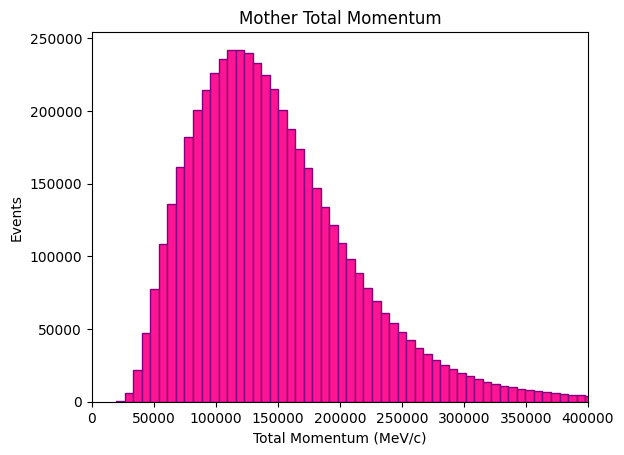

In [11]:
#use the histogram plotting tools, plot the momentum of the mother
#calculating components of mother
xmomentumM = xmomentum1 + xmomentum2 + xmomentum3
ymomentumM = ymomentum1 + ymomentum2 + ymomentum3
zmomentumM = zmomentum1 + zmomentum2 + zmomentum3
#calculating total momentum of mother
totmomentumM = np.sqrt(np.square(xmomentumM) + np.square(ymomentumM) + np.square(zmomentumM))

#plotting histogram for H3
plt.hist(totmomentumM, bins = 2000, color='deeppink', edgecolor='purple')
plt.xlim(0, 0.4*1e6)
plt.xlabel('Total Momentum (MeV/c)')
plt.ylabel('Events')
plt.title('Mother Total Momentum')
plt.show()

Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45

In [12]:
tree.keys()

['B_FlightDistance',
 'B_VertexChi2',
 'H1_PX',
 'H1_PY',
 'H1_PZ',
 'H1_ProbK',
 'H1_ProbPi',
 'H1_Charge',
 'H1_IPChi2',
 'H1_isMuon',
 'H2_PX',
 'H2_PY',
 'H2_PZ',
 'H2_ProbK',
 'H2_ProbPi',
 'H2_Charge',
 'H2_IPChi2',
 'H2_isMuon',
 'H3_PX',
 'H3_PY',
 'H3_PZ',
 'H3_ProbK',
 'H3_ProbPi',
 'H3_Charge',
 'H3_IPChi2',
 'H3_isMuon']

We have now completed the initial steps and begun to work through what we need to with the data. This is a perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energy, we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

In [13]:
#assuming all daughter particles are kaons
massK = 493.7 #in MeV/c**2
E1 = np.sqrt((totmomentum1**2) + (massK**2))
E2 = np.sqrt((totmomentum2**2) + (massK**2))
E3 = np.sqrt((totmomentum3**2) + (massK**2))

#mother
Mmass = np.sqrt(((E1 + E2 + E3)**2)-(totmomentumM**2))

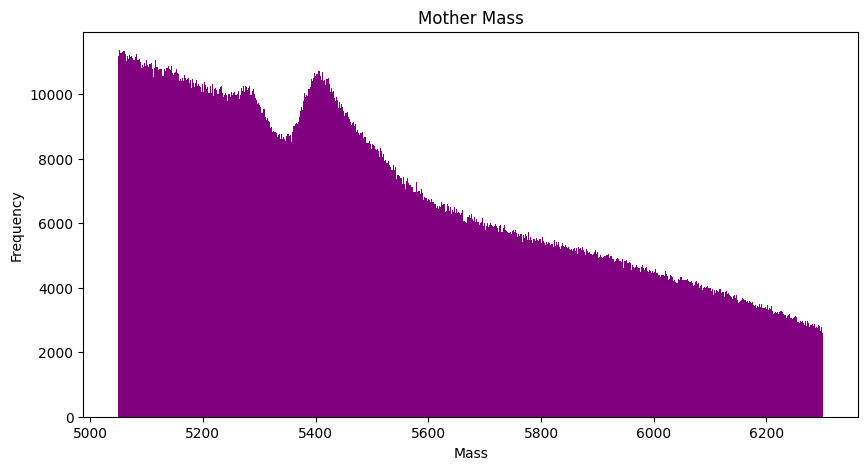

In [14]:
#plotting histogram for H3
plt.figure(figsize=(10,5))
plt.hist(Mmass, bins = 750, color='purple')

plt.xlabel('Mass')
plt.ylabel('Frequency')
plt.title('Mother Mass')
plt.show()

We know that some of our particles are the B+ and some are the B- particle. There will also be some particles in our system that are not coming from a genuine B+/- or are a B+/- but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

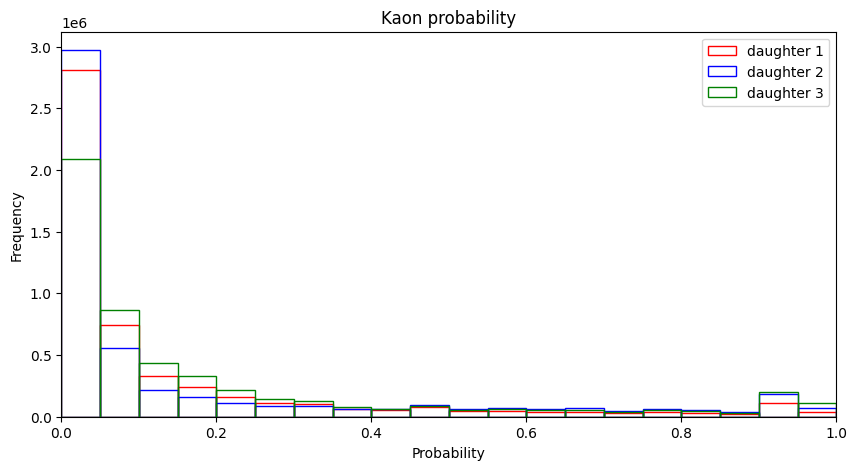

In [15]:
#Make plots of H1/H2/H3 _ProbK on one plot
ProbK1 = tree["H1_ProbK"].array(library="np")
ProbK2 = tree["H2_ProbK"].array(library="np")
ProbK3 = tree["H3_ProbK"].array(library="np")

plt.figure(figsize=(10,5))
plt.hist(ProbK1, bins = 20, range=(0,1), fill=False, edgecolor='red', label='daughter 1')
plt.hist(ProbK2, bins = 20, range=(0,1), fill=False, edgecolor='blue', label='daughter 2')
plt.hist(ProbK3, bins = 20, range=(0,1), fill=False, edgecolor='green', label='daughter 3')
plt.legend(loc='best')
plt.xlim(0,1)
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Kaon probability')
plt.show()

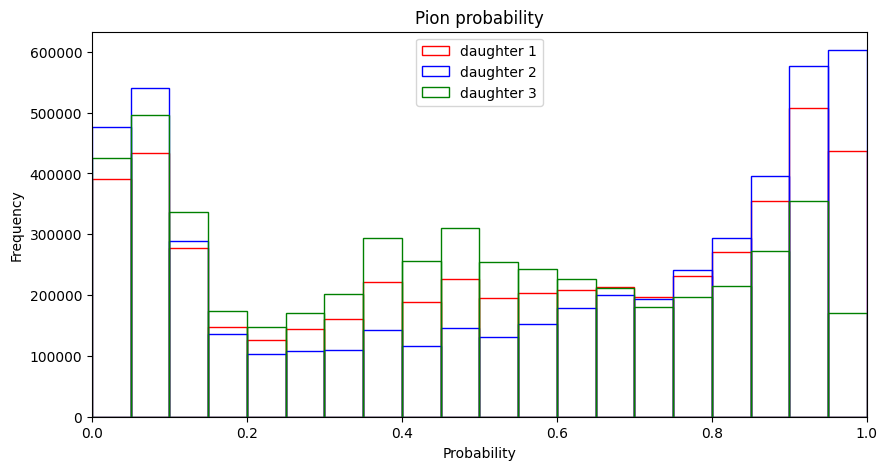

In [16]:
#Make plots of H1/H2/H3 _ProbPi on one plot
ProbPi1 = tree["H1_ProbPi"].array(library="np")
ProbPi2 = tree["H2_ProbPi"].array(library="np")
ProbPi3 = tree["H3_ProbPi"].array(library="np")

plt.figure(figsize=(10,5))
plt.hist(ProbPi1, bins = 20, range=(0,1), fill=False, edgecolor='red', label='daughter 1')
plt.hist(ProbPi2, bins = 20, range=(0,1), fill=False, edgecolor='blue', label='daughter 2')
plt.hist(ProbPi3, bins = 20, range=(0,1), fill=False, edgecolor='green', label='daughter 3')
plt.legend(loc='best')
plt.xlim(0,1)
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Pion probability')
plt.show()

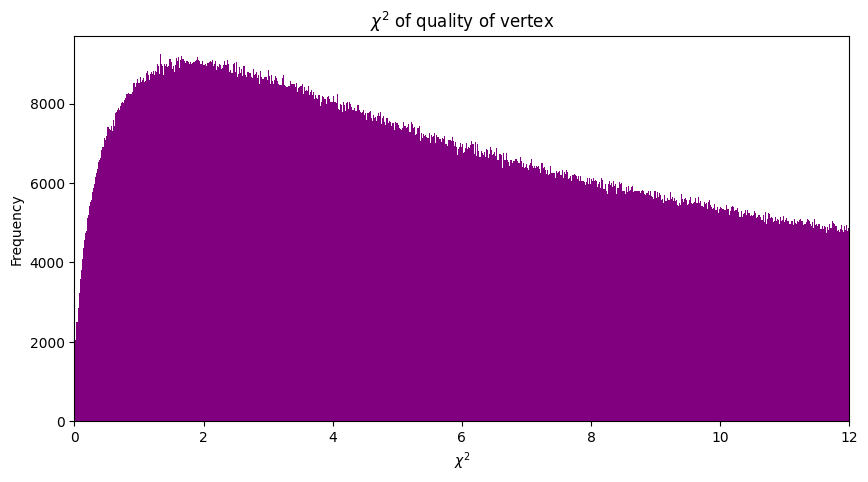

In [17]:
#For all our particles, make a plot of the B_VertexChi2
BVerChi2 = tree["B_VertexChi2"].array(library="np")

plt.figure(figsize=(10,5))
plt.hist(BVerChi2, bins = 750, color='purple')
plt.xlim(0,12)
plt.xlabel('$\chi^{2}$')
plt.ylabel('Frequency')
plt.title('$\chi^{2}$ of quality of vertex')
plt.show()

Using these plots, we can now make a preselection string. This is a text string that looks like

In [18]:
#making array of all probabilities to make selection from
Array = tree.arrays(['H1_ProbK', 'H1_ProbPi', 'H1_isMuon', 'H1_PX', 'H1_PY', 'H1_PZ', 'H1_isMuon', 'H1_Charge',
                     'H2_ProbK', 'H2_ProbPi', 'H2_isMuon', 'H2_PX', 'H2_PY', 'H2_PZ', 'H2_isMuon', 'H2_Charge',
                     'H3_ProbK', 'H3_ProbPi', 'H3_isMuon', 'H3_PX', 'H3_PY', 'H3_PZ', 'H3_isMuon', 'H3_Charge'])

38744


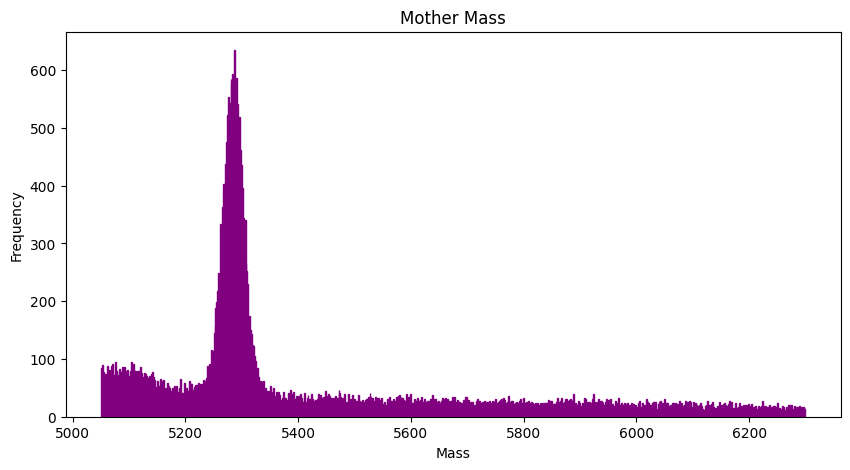

In [19]:
#making a selection where ProbK > ProbPi and isMuon == 0
selection = np.where((Array.H1_ProbK > Array.H1_ProbPi) & (Array.H2_ProbK > Array.H2_ProbPi) & (Array.H3_ProbK > Array.H3_ProbPi) &
                     (Array.H1_isMuon == 0) & (Array.H2_isMuon == 0) & (Array.H3_isMuon == 0))
cutMmass = np.take(Mmass, selection[0])
print(len(cutMmass))
#plotting histogram of cut mother mass
plt.figure(figsize=(10,5))
plt.hist(cutMmass, bins = 750, color='deeppink', edgecolor='purple')

plt.xlabel('Mass')
plt.ylabel('Frequency')
plt.title('Mother Mass')
plt.show()

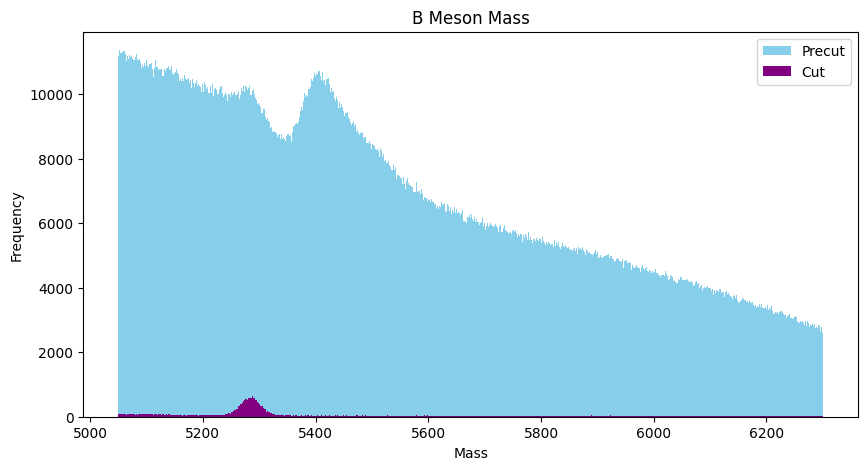

In [20]:
#histogram with precut and cut B Meson mass
plt.figure(figsize=(10,5))
plt.hist(Mmass, bins = 750, color='skyblue', label='Precut')
plt.hist(cutMmass, bins = 750, color='purple', label='Cut')

plt.legend(loc='upper right')
plt.xlabel('Mass')
plt.ylabel('Frequency')
plt.title('B Meson Mass')
plt.show()

#How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

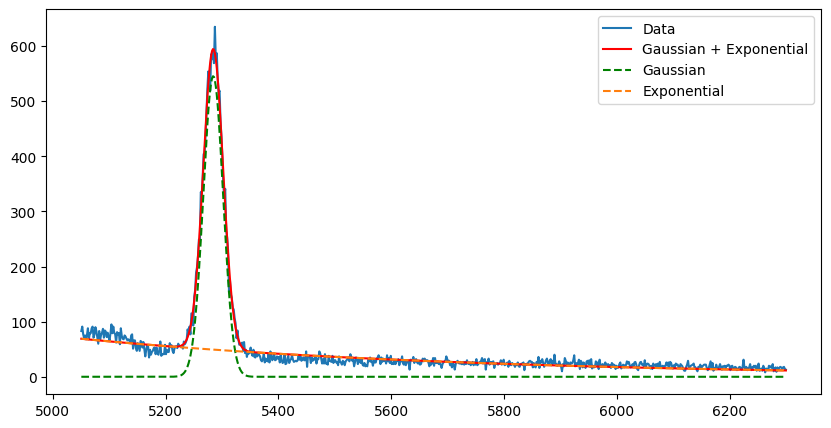

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#defining the functions for gaussian and exponential and the combined
def gaussian(x, amp, mean, sigma):
  return amp * np.exp(-(x-mean)**2 / (2 * sigma**2))

def exponential(x, amp, decay):
  return amp * np.exp(-decay * x)

def gaussexp(x,amp_gauss,mean,sigma,amp_exp,decay):
    return exponential(x, amp_exp, decay) + gaussian(x, amp_gauss, mean,sigma)

bins=750
#bin contents is my y values
bin_contents, bin_edges = np.histogram(cutMmass, bins=bins, range=(5050, 6300))
y_data = np.array(bin_contents)
#bin centers are my x values
x_data = np.array((bin_edges[:-1] + bin_edges[1:]) / 2.0)

#creating some initials values
guess_vals=[500, 5300, 20, 360000, 1.7e-3]
#creating the curve fitting
fit_vals, cov = curve_fit(gaussexp, x_data, y_data, guess_vals)

#creating the y values for all the different graphs
y_fit = gaussexp(x_data, *fit_vals)
signal = gaussian(x_data, *fit_vals[:3])
background = exponential(x_data, *fit_vals[3:])

#plotting to check graphs
plt.figure(figsize=(10,5))
plt.plot(x_data, y_data, label='Data')
plt.plot(x_data, y_fit, 'r-', label='Gaussian + Exponential')
plt.plot(x_data, signal, 'g--', label='Gaussian')
plt.plot(x_data, background, '--', label='Exponential')
plt.legend()
plt.show()

Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do all):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?

We can use the .getValV() function on our signal and background *normalisation* components, e.g. Gauss_Norm=Gauss.getValV()

To find the error (on this number) we can use .getError()

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

Signal yield: 39939.18119925029 ± 290.9646274481232
Background yield: 40055.53144034125 ± 1639.0576188193243
Reduced Chi-Squared Value: 1.894755210554806


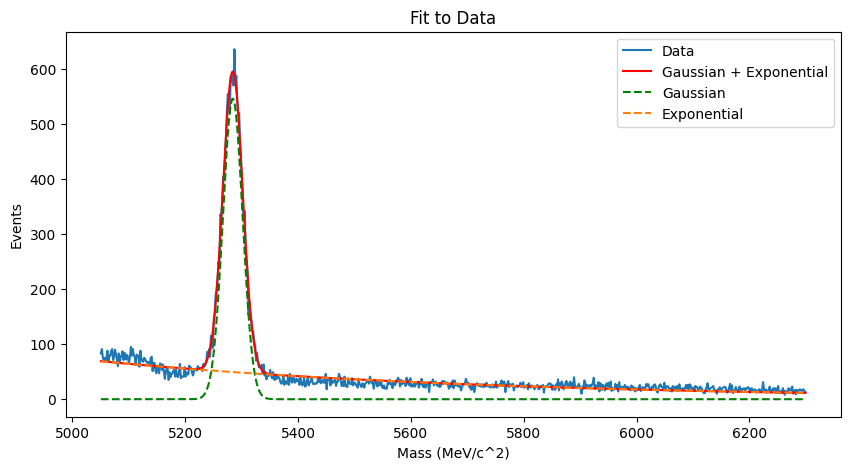

In [22]:
#calculating the chi-square manually
residuals = y_data - gaussexp(x_data, *fit_vals)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data - np.mean(y_data))**2)
r_squared = 1 - (ss_res / ss_tot)
chi_square = np.sum((residuals**2) / gaussexp(x_data, *fit_vals))
reduced_chi_square = chi_square / (len(y_data) - len(fit_vals))

#calculating the errors on the fit parameters
fit_errors = np.sqrt(np.diag(cov))
amp_gauss, mean, stddev, amp_exp, decay = fit_vals
error_amp_gauss, error_mean, error_stddev, error_amp_exp, error_decay = fit_errors

#signal yield is the integral of the Gaussian part
#for an exact integral we need to use the bin width
bin_width = x_data[1] - x_data[0]
signal_yield = fit_vals[0] * fit_vals[2] * np.sqrt(2 * np.pi) * bin_width

error_signal_yield = np.sqrt((error_amp_gauss * stddev * np.sqrt(2 * np.pi) * bin_width)**2 +
                             (amp_gauss * error_stddev * np.sqrt(2 * np.pi) * bin_width)**2)


#background yield is the integral of the exponential part
#this cant be integrated exactly, so it has to be done numerically
background_yield = np.sum(exponential(x_data, *fit_vals[3:]) * bin_width)


#calculate background yield error
error_background_yield = np.sqrt(np.sum((exponential(x_data, amp_exp, decay) * bin_width)**2))

print(f"Signal yield: {signal_yield} ± {error_signal_yield}")
print(f"Background yield: {background_yield} ± {error_background_yield}")
print(f"Reduced Chi-Squared Value: {reduced_chi_square}")

#plot the histogram, the fitted curve, and the individual components
plt.figure(figsize=(10,5))
plt.plot(x_data, y_data, label='Data')
plt.plot(x_data, y_fit, 'r-', label='Gaussian + Exponential')
plt.plot(x_data, signal, 'g--', label='Gaussian')
plt.plot(x_data, background, '--', label='Exponential')
plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('Events')
plt.title('Fit to Data')
plt.legend()
plt.show()

#Counting

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

In [23]:
#when B+, total charge of Kaons is 1
#also adding the previous selection from cutMmass to it
chargePos_selection = np.where((Array.H1_Charge + Array.H2_Charge + Array.H3_Charge == 1) &
                               (Array.H1_ProbK > Array.H1_ProbPi) & (Array.H2_ProbK > Array.H2_ProbPi) & (Array.H3_ProbK > Array.H3_ProbPi) &
                               (Array.H1_isMuon == 0) & (Array.H2_isMuon == 0) & (Array.H3_isMuon == 0))
#when B-, total charge of Kaons is -1
chargeNeg_selection = np.where((Array.H1_Charge + Array.H2_Charge + Array.H3_Charge == -1) &
                               (Array.H1_ProbK > Array.H1_ProbPi) & (Array.H2_ProbK > Array.H2_ProbPi) & (Array.H3_ProbK > Array.H3_ProbPi) &
                               (Array.H1_isMuon == 0) & (Array.H2_isMuon == 0) & (Array.H3_isMuon == 0))

chargePos = np.take(Mmass, chargePos_selection[0])
chargeNeg = np.take(Mmass, chargeNeg_selection[0])

print(len(chargePos))
print(len(chargeNeg))

20213
18531


Signal yield: 21402.983555874453 ± 177.077853229188


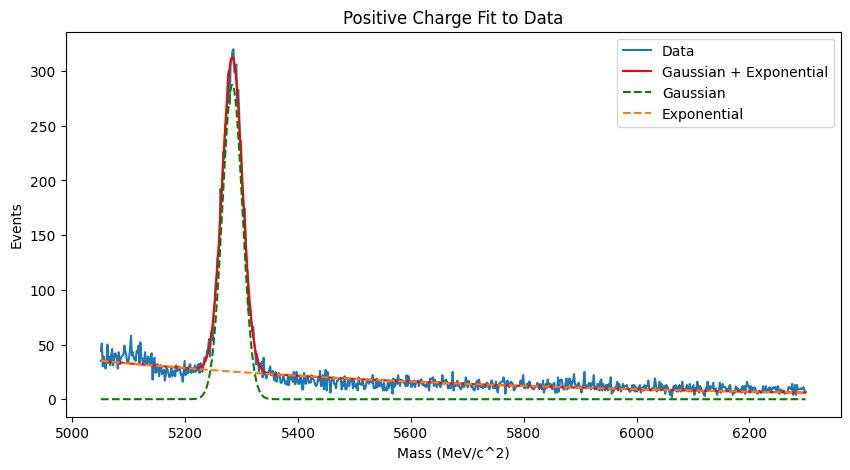

In [24]:
#bin contents is my y values
bin_contents, bin_edges = np.histogram(chargePos, bins=bins, range=(5050, 6300))
yPos = np.array(bin_contents)
#bin centers are my x values
xPos = np.array((bin_edges[:-1] + bin_edges[1:]) / 2.0)

#creating some initials values
guess_vals=[500, 5300, 20, 360000, 1.7e-3]
#creating the curve fitting
fit_vals, cov = curve_fit(gaussexp, xPos, yPos, guess_vals)

#creating the y values for all the different graphs
yPos_fit = gaussexp(xPos, *fit_vals)
Pos_signal = gaussian(xPos, *fit_vals[:3])
Pos_background = exponential(xPos, *fit_vals[3:])

#calculating the errors on the fit parameters
fit_errors = np.sqrt(np.diag(cov))
amp_gauss, mean, stddev, amp_exp, decay = fit_vals
error_amp_gauss, error_mean, error_stddev, error_amp_exp, error_decay = fit_errors

#signal yield is the integral of the Gaussian part
#for an exact integral we need to use the bin width
bin_width = x_data[1] - x_data[0]
signal_yield = fit_vals[0] * fit_vals[2] * np.sqrt(2 * np.pi) * bin_width

error_signal_yield = np.sqrt((error_amp_gauss * stddev * np.sqrt(2 * np.pi) * bin_width)**2 +
                             (amp_gauss * error_stddev * np.sqrt(2 * np.pi) * bin_width)**2)

print(f"Signal yield: {signal_yield} ± {error_signal_yield}")

#plotting to check graphs
plt.figure(figsize=(10,5))
plt.plot(xPos, yPos, label='Data')
plt.plot(xPos, yPos_fit, 'r-', label='Gaussian + Exponential')
plt.plot(xPos, Pos_signal, 'g--', label='Gaussian')
plt.plot(xPos, Pos_background, '--', label='Exponential')
plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('Events')
plt.title('Positive Charge Fit to Data')
plt.legend()
plt.show()

Signal yield: 18544.136647192776 ± 186.16986750958213


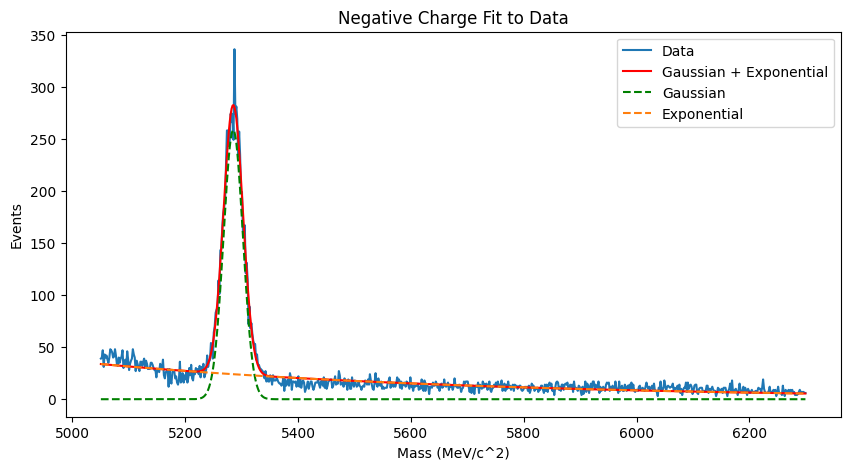

In [25]:
#bin contents is my y values
bin_contents, bin_edges = np.histogram(chargeNeg, bins=bins, range=(5050, 6300))
yNeg = np.array(bin_contents)
#bin centers are my x values
xNeg = np.array((bin_edges[:-1] + bin_edges[1:]) / 2.0)

#creating some initials values
guess_vals=[500, 5300, 20, 360000, 1.7e-3]
#creating the curve fitting
fit_vals, cov = curve_fit(gaussexp, xNeg, yNeg, guess_vals)

#creating the y values for all the different graphs
yNeg_fit = gaussexp(xNeg, *fit_vals)
Neg_signal = gaussian(xNeg, *fit_vals[:3])
Neg_background = exponential(xNeg, *fit_vals[3:])

#calculating the errors on the fit parameters
fit_errors = np.sqrt(np.diag(cov))
amp_gauss, mean, stddev, amp_exp, decay = fit_vals
error_amp_gauss, error_mean, error_stddev, error_amp_exp, error_decay = fit_errors

#signal yield is the integral of the Gaussian part
#for an exact integral we need to use the bin width
bin_width = x_data[1] - x_data[0]
signal_yield = fit_vals[0] * fit_vals[2] * np.sqrt(2 * np.pi) * bin_width

error_signal_yield = np.sqrt((error_amp_gauss * stddev * np.sqrt(2 * np.pi) * bin_width)**2 +
                             (amp_gauss * error_stddev * np.sqrt(2 * np.pi) * bin_width)**2)

print(f"Signal yield: {signal_yield} ± {error_signal_yield}")

#plotting to check graphs
plt.figure(figsize=(10,5))
plt.plot(xNeg, yNeg, label='Data')
plt.plot(xNeg, yNeg_fit, 'r-', label='Gaussian + Exponential')
plt.plot(xNeg, Neg_signal, 'g--', label='Gaussian')
plt.plot(xNeg, Neg_background, '--', label='Exponential')
plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('Events')
plt.title('Negative Charge Fit to Data')
plt.legend()
plt.show()

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

In [26]:
def Asym(numberNeg, numberPos):
  return np.divide(numberNeg - numberPos, numberNeg + numberPos)

def sigmaA(Asym, numberNeg, numberPos):
  return np.sqrt(np.divide(1 - Asym(numberNeg, numberPos)**2, numberNeg + numberPos))

numberPos = len(chargePos)
numberNeg = len(chargeNeg)

print(f"Assymetry: {Asym(numberNeg, numberPos)}")
print(f"Uncertainty: {sigmaA(Asym, numberNeg, numberPos)}")

Assymetry: -0.04341317365269461
Uncertainty: 0.005075608635797462


#Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

Checking MagnetUp:

In [27]:
import uproot
file = uproot.open("/content/LHCb_Data/B2HHH_MagnetUp.root")
uptree = file["DecayTree"]

In [28]:
import numpy as np
#making arrays for each direction
xmomentum1 = uptree["H1_PX"].array(library="np")
ymomentum1 = uptree["H1_PY"].array(library="np")
zmomentum1 = uptree["H1_PZ"].array(library="np")
totmomentum1 = np.sqrt(np.square(xmomentum1) + np.square(ymomentum1) + np.square(zmomentum1))

xmomentum2 = uptree["H2_PX"].array(library="np")
ymomentum2 = uptree["H2_PY"].array(library="np")
zmomentum2 = uptree["H2_PZ"].array(library="np")
totmomentum2 = np.sqrt(np.square(xmomentum2) + np.square(ymomentum2) + np.square(zmomentum2))

xmomentum3 = uptree["H3_PX"].array(library="np")
ymomentum3 = uptree["H3_PY"].array(library="np")
zmomentum3 = uptree["H3_PZ"].array(library="np")
totmomentum3 = np.sqrt(np.square(xmomentum3) + np.square(ymomentum3) + np.square(zmomentum3))

#calculating components of mother
xmomentumM = xmomentum1 + xmomentum2 + xmomentum3
ymomentumM = ymomentum1 + ymomentum2 + ymomentum3
zmomentumM = zmomentum1 + zmomentum2 + zmomentum3
#calculating total momentum of mother
totmomentumM = np.sqrt(np.square(xmomentumM) + np.square(ymomentumM) + np.square(zmomentumM))

#assuming all daughter particles are kaons
massK = 493.7 #in MeV/c**2
E1 = np.sqrt((totmomentum1**2) + (massK**2))
E2 = np.sqrt((totmomentum2**2) + (massK**2))
E3 = np.sqrt((totmomentum3**2) + (massK**2))

#mother
UpMmass = np.sqrt(((E1 + E2 + E3)**2)-(totmomentumM**2))

In [29]:
#making array of all probabilities to make selection from
UpArray = uptree.arrays(['H1_ProbK', 'H1_ProbPi', 'H1_isMuon', 'H1_PX', 'H1_PY', 'H1_PZ', 'H1_isMuon', 'H1_Charge',
                     'H2_ProbK', 'H2_ProbPi', 'H2_isMuon', 'H2_PX', 'H2_PY', 'H2_PZ', 'H2_isMuon', 'H2_Charge',
                     'H3_ProbK', 'H3_ProbPi', 'H3_isMuon', 'H3_PX', 'H3_PY', 'H3_PZ', 'H3_isMuon', 'H3_Charge'])

25974


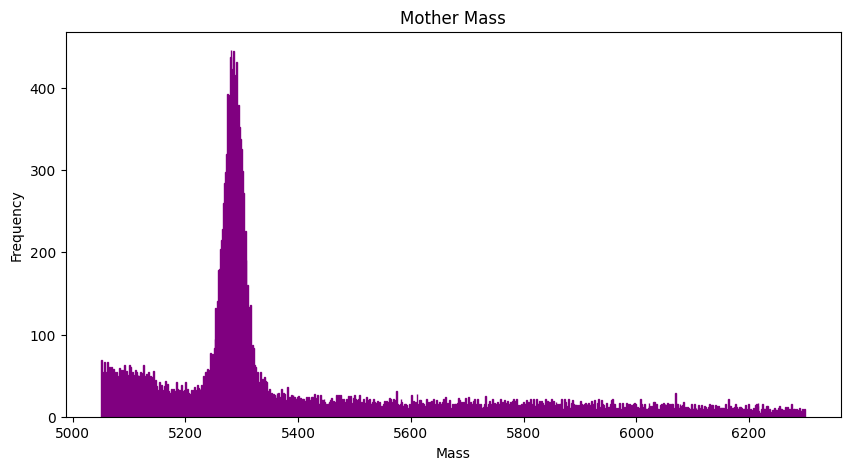

In [30]:
import matplotlib.pyplot as plt
#making a selection where ProbK > ProbPi and isMuon == 0
selection = np.where((UpArray.H1_ProbK > UpArray.H1_ProbPi) & (UpArray.H2_ProbK > UpArray.H2_ProbPi) & (UpArray.H3_ProbK > UpArray.H3_ProbPi) &
                     (UpArray.H1_isMuon == 0) & (UpArray.H2_isMuon == 0) & (UpArray.H3_isMuon == 0))
cutUpMmass = np.take(UpMmass, selection[0])
print(len(cutUpMmass))
#plotting histogram of cut mother mass
plt.figure(figsize=(10,5))
plt.hist(cutUpMmass, bins = 750, color='deeppink', edgecolor='purple')

plt.xlabel('Mass')
plt.ylabel('Frequency')
plt.title('Mother Mass')
plt.show()

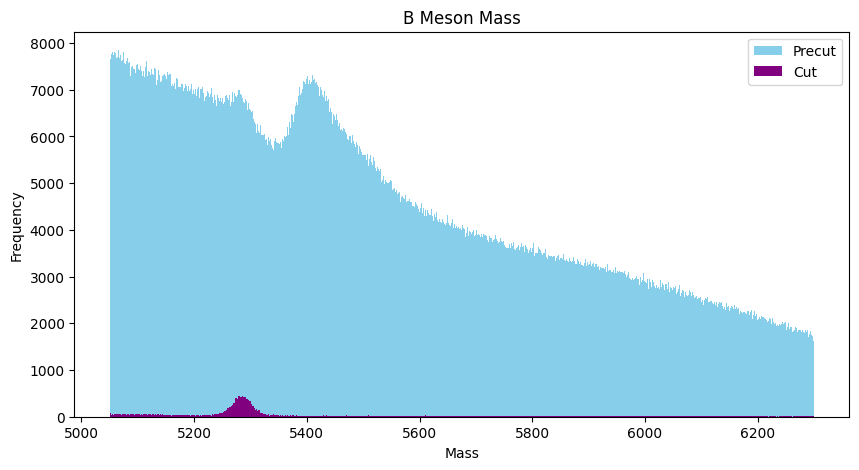

In [31]:
#histogram with precut and cut B Meson mass
plt.figure(figsize=(10,5))
plt.hist(UpMmass, bins = 750, color='skyblue', label='Precut')
plt.hist(cutUpMmass, bins = 750, color='purple', label='Cut')

plt.legend(loc='upper right')
plt.xlabel('Mass')
plt.ylabel('Frequency')
plt.title('B Meson Mass')
plt.show()

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#defining the functions for gaussian and exponential and the combined
def gaussian(x, amp, mean, sigma):
  return amp * np.exp(-(x-mean)**2 / (2 * sigma**2))

def exponential(x, amp, decay):
  return amp * np.exp(-decay * x)

def gaussexp(x,amp_gauss,mean,sigma,amp_exp,decay):
    return exponential(x, amp_exp, decay) + gaussian(x, amp_gauss, mean,sigma)

bins=750
#bin contents is my y values
bin_contents, bin_edges = np.histogram(cutUpMmass, bins=bins, range=(5050, 6300))
y_data = np.array(bin_contents)
#bin centers are my x values
x_data = np.array((bin_edges[:-1] + bin_edges[1:]) / 2.0)

#creating some initials values
guess_vals=[500, 5300, 20, 360000, 1.7e-3]
#creating the curve fitting
fit_vals, cov = curve_fit(gaussexp, x_data, y_data, guess_vals)

#creating the y values for all the different graphs
y_fit = gaussexp(x_data, *fit_vals)
signal = gaussian(x_data, *fit_vals[:3])
background = exponential(x_data, *fit_vals[3:])

Signal yield: 28300.7689818408 ± 223.1235365716833
Background yield: 25847.51444799757 ± 1087.7400366558002
Reduced Chi-Squared Value: 1.7534749744631464


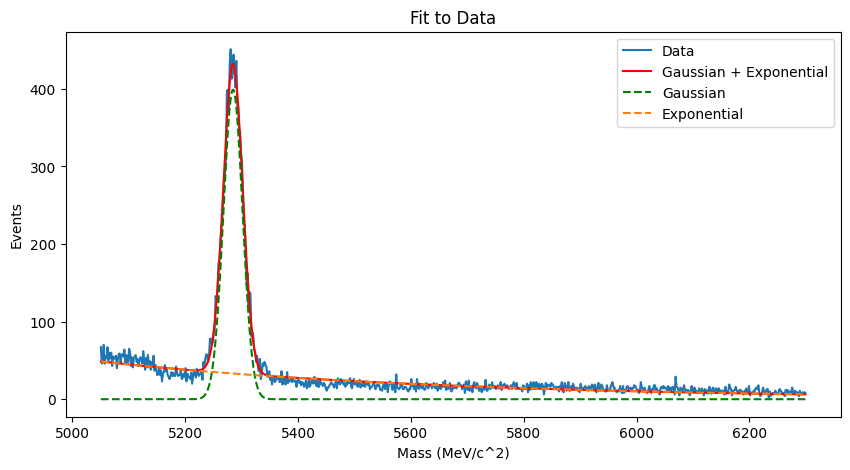

In [33]:
#calculating the chi-square manually
residuals = y_data - gaussexp(x_data, *fit_vals)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data - np.mean(y_data))**2)
r_squared = 1 - (ss_res / ss_tot)
chi_square = np.sum((residuals**2) / gaussexp(x_data, *fit_vals))
reduced_chi_square = chi_square / (len(y_data) - len(fit_vals))

#calculating the errors on the fit parameters
fit_errors = np.sqrt(np.diag(cov))
amp_gauss, mean, stddev, amp_exp, decay = fit_vals
error_amp_gauss, error_mean, error_stddev, error_amp_exp, error_decay = fit_errors

#signal yield is the integral of the Gaussian part
#for an exact integral we need to use the bin width
bin_width = x_data[1] - x_data[0]
signal_yield = fit_vals[0] * fit_vals[2] * np.sqrt(2 * np.pi) * bin_width

error_signal_yield = np.sqrt((error_amp_gauss * stddev * np.sqrt(2 * np.pi) * bin_width)**2 +
                             (amp_gauss * error_stddev * np.sqrt(2 * np.pi) * bin_width)**2)


#background yield is the integral of the exponential part
#this cant be integrated exactly, so it has to be done numerically
background_yield = np.sum(exponential(x_data, *fit_vals[3:]) * bin_width)


#calculate background yield error
error_background_yield = np.sqrt(np.sum((exponential(x_data, amp_exp, decay) * bin_width)**2))

print(f"Signal yield: {signal_yield} ± {error_signal_yield}")
print(f"Background yield: {background_yield} ± {error_background_yield}")
print(f"Reduced Chi-Squared Value: {reduced_chi_square}")

#plot the histogram, the fitted curve, and the individual components
plt.figure(figsize=(10,5))
plt.plot(x_data, y_data, label='Data')
plt.plot(x_data, y_fit, 'r-', label='Gaussian + Exponential')
plt.plot(x_data, signal, 'g--', label='Gaussian')
plt.plot(x_data, background, '--', label='Exponential')
plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('Events')
plt.title('Fit to Data')
plt.legend()
plt.show()

In [34]:
#when B+, total charge of Kaons is 1
#also adding the previous selection from cutMmass to it
chargePos_selection = np.where((UpArray.H1_Charge + UpArray.H2_Charge + UpArray.H3_Charge == 1) &
                               (UpArray.H1_ProbK > UpArray.H1_ProbPi) & (UpArray.H2_ProbK > UpArray.H2_ProbPi) & (UpArray.H3_ProbK > UpArray.H3_ProbPi) &
                               (UpArray.H1_isMuon == 0) & (UpArray.H2_isMuon == 0) & (UpArray.H3_isMuon == 0))
#when B-, total charge of Kaons is -1
chargeNeg_selection = np.where((UpArray.H1_Charge + UpArray.H2_Charge + UpArray.H3_Charge == -1) &
                               (UpArray.H1_ProbK > UpArray.H1_ProbPi) & (UpArray.H2_ProbK > UpArray.H2_ProbPi) & (UpArray.H3_ProbK > UpArray.H3_ProbPi) &
                               (UpArray.H1_isMuon == 0) & (UpArray.H2_isMuon == 0) & (UpArray.H3_isMuon == 0))

chargePos = np.take(UpMmass, chargePos_selection[0])
chargeNeg = np.take(UpMmass, chargeNeg_selection[0])

print(len(chargePos))
print(len(chargeNeg))

13427
12547


Signal yield: 14807.952871095798 ± 142.66703885454086


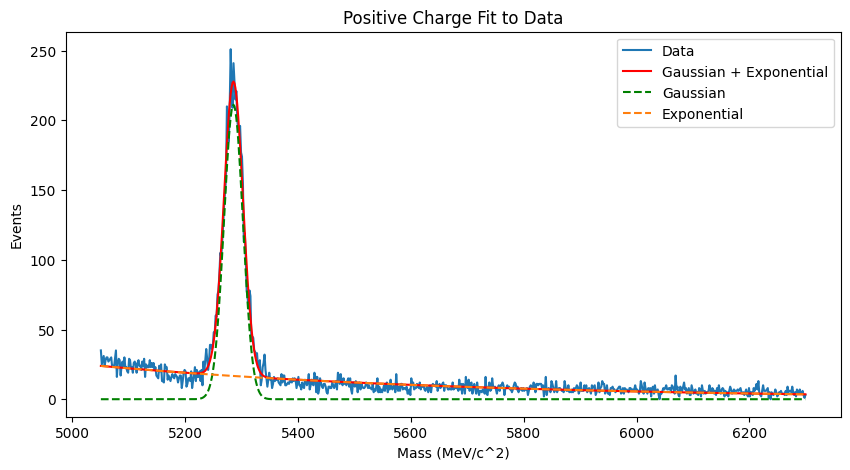

In [35]:
#bin contents is my y values
bin_contents, bin_edges = np.histogram(chargePos, bins=bins, range=(5050, 6300))
yPos = np.array(bin_contents)
#bin centers are my x values
xPos = np.array((bin_edges[:-1] + bin_edges[1:]) / 2.0)

#creating some initials values
guess_vals=[500, 5300, 20, 360000, 1.7e-3]
#creating the curve fitting
fit_vals, cov = curve_fit(gaussexp, xPos, yPos, guess_vals)

#creating the y values for all the different graphs
yPos_fit = gaussexp(xPos, *fit_vals)
Pos_signal = gaussian(xPos, *fit_vals[:3])
Pos_background = exponential(xPos, *fit_vals[3:])

#calculating the errors on the fit parameters
fit_errors = np.sqrt(np.diag(cov))
amp_gauss, mean, stddev, amp_exp, decay = fit_vals
error_amp_gauss, error_mean, error_stddev, error_amp_exp, error_decay = fit_errors

#signal yield is the integral of the Gaussian part
#for an exact integral we need to use the bin width
bin_width = x_data[1] - x_data[0]
signal_yield = fit_vals[0] * fit_vals[2] * np.sqrt(2 * np.pi) * bin_width

error_signal_yield = np.sqrt((error_amp_gauss * stddev * np.sqrt(2 * np.pi) * bin_width)**2 +
                             (amp_gauss * error_stddev * np.sqrt(2 * np.pi) * bin_width)**2)

print(f"Signal yield: {signal_yield} ± {error_signal_yield}")

#plotting to check graphs
plt.figure(figsize=(10,5))
plt.plot(xPos, yPos, label='Data')
plt.plot(xPos, yPos_fit, 'r-', label='Gaussian + Exponential')
plt.plot(xPos, Pos_signal, 'g--', label='Gaussian')
plt.plot(xPos, Pos_background, '--', label='Exponential')
plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('Events')
plt.title('Positive Charge Fit to Data')
plt.legend()
plt.show()

Signal yield: 13483.607157289282 ± 141.28980980665062


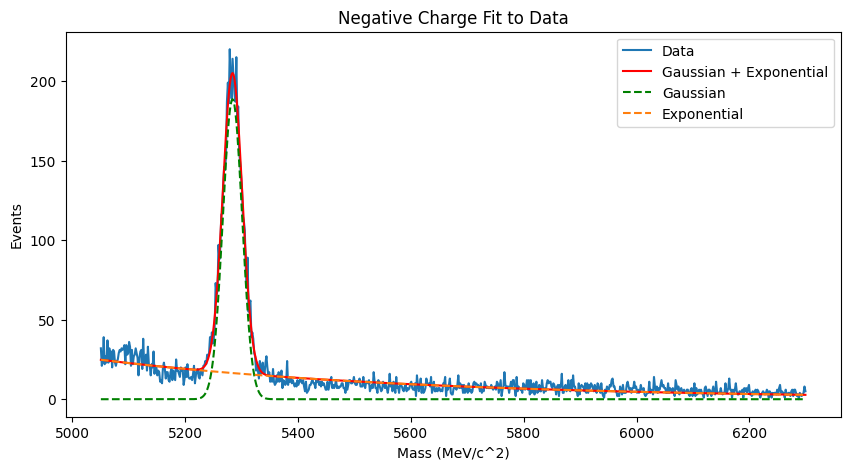

In [36]:
#bin contents is my y values
bin_contents, bin_edges = np.histogram(chargeNeg, bins=bins, range=(5050, 6300))
yNeg = np.array(bin_contents)
#bin centers are my x values
xNeg = np.array((bin_edges[:-1] + bin_edges[1:]) / 2.0)

#creating some initials values
guess_vals=[500, 5300, 20, 360000, 1.7e-3]
#creating the curve fitting
fit_vals, cov = curve_fit(gaussexp, xNeg, yNeg, guess_vals)

#creating the y values for all the different graphs
yNeg_fit = gaussexp(xNeg, *fit_vals)
Neg_signal = gaussian(xNeg, *fit_vals[:3])
Neg_background = exponential(xNeg, *fit_vals[3:])

#calculating the errors on the fit parameters
fit_errors = np.sqrt(np.diag(cov))
amp_gauss, mean, stddev, amp_exp, decay = fit_vals
error_amp_gauss, error_mean, error_stddev, error_amp_exp, error_decay = fit_errors

#signal yield is the integral of the Gaussian part
#for an exact integral we need to use the bin width
bin_width = x_data[1] - x_data[0]
signal_yield = fit_vals[0] * fit_vals[2] * np.sqrt(2 * np.pi) * bin_width

error_signal_yield = np.sqrt((error_amp_gauss * stddev * np.sqrt(2 * np.pi) * bin_width)**2 +
                             (amp_gauss * error_stddev * np.sqrt(2 * np.pi) * bin_width)**2)

print(f"Signal yield: {signal_yield} ± {error_signal_yield}")

#plotting to check graphs
plt.figure(figsize=(10,5))
plt.plot(xNeg, yNeg, label='Data')
plt.plot(xNeg, yNeg_fit, 'r-', label='Gaussian + Exponential')
plt.plot(xNeg, Neg_signal, 'g--', label='Gaussian')
plt.plot(xNeg, Neg_background, '--', label='Exponential')
plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('Events')
plt.title('Negative Charge Fit to Data')
plt.legend()
plt.show()

In [37]:
def Asym(numberNeg, numberPos):
  return np.divide(numberNeg - numberPos, numberNeg + numberPos)

def sigmaA(Asym, numberNeg, numberPos):
  return np.sqrt(np.divide(1 - Asym(numberNeg, numberPos)**2, numberNeg + numberPos))

numberPos = len(chargePos)
numberNeg = len(chargeNeg)

print(f"Assymetry: {Asym(numberNeg, numberPos)}")
print(f"Uncertainty: {sigmaA(Asym, numberNeg, numberPos)}")

Assymetry: -0.03388003388003388
Uncertainty: 0.006201277769384391


## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [ ]:
#Define a function to find the invarient mass of two given Kaons

In [ ]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your scatter

We can further improve our plot, since two sets of particles on each axis are exactly the same (one positive Kaon, one negative Kaon). So we can plot the maximum of the two values on one axis and the minimum on the other. We can use a quick numpy check and then plot those values.

In [ ]:
#Make the revised Dalitz plot here for B+ mesons

In [ ]:
#Make the revised Dalitz plot here for B- mesons

In [ ]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)